In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
set_exercise = pd.read_csv(r"C:\Users\Yeswanth Reddy\Downloads\bill_authentication.csv")

In [146]:
set_exercise.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [4]:
set_exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
set_exercise.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
set_exercise.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [150]:
set_exercise_dp = set_exercise[set_exercise.duplicated(keep=False)]

In [21]:
set_exercise_cleaned = set_exercise.drop_duplicates()

In [22]:
set_exercise_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1348 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1348 non-null   float64
 1   Skewness  1348 non-null   float64
 2   Curtosis  1348 non-null   float64
 3   Entropy   1348 non-null   float64
 4   Class     1348 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 63.2 KB


In [24]:
set_exercise_cleaned.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn import tree

In [50]:
X = set_exercise_cleaned.drop('Class', axis =1)

In [51]:
y =set_exercise_cleaned['Class']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [53]:
Classifier = DecisionTreeClassifier()

In [54]:
Classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred = Classifier.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9925925925925926

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       230
           1       0.99      0.99      0.99       175

    accuracy                           0.99       405
   macro avg       0.99      0.99      0.99       405
weighted avg       0.99      0.99      0.99       405



In [71]:
feature_names = X.columns

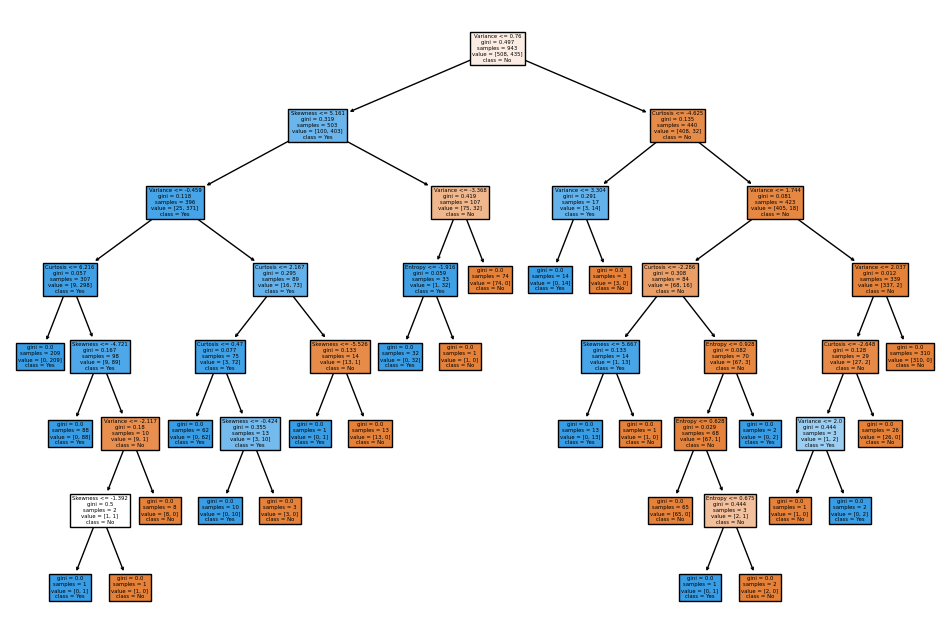

In [74]:
plt.figure(figsize=(12,8))
tree.plot_tree(Classifier, 
               feature_names = list(X.columns),
               class_names=['No','Yes'],
               filled = True);
plt.show()

In [66]:
print(confusion_matrix(y_test, y_pred))

[[228   2]
 [  1 174]]


In [ ]:
3. code for clustering

In [75]:
set_exercise_cleaned.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [93]:
X_scaled = scaler.fit_transform(X)
km = KMeans(n_clusters=4, n_init=25, random_state=1234)

In [94]:
km.fit(X_scaled)

C:\Users\Yeswanth Reddy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=4, n_init=25, random_state=1234)

In [95]:
km.labels_

array([1, 1, 3, ..., 0, 0, 3])

In [96]:
km.inertia_

1877.1894808390725

In [97]:
pd.Series(km.labels_).value_counts().sort_index()

0    217
1    294
2    254
3    583
Name: count, dtype: int64

In [98]:
km.cluster_centers_

array([[-0.86774135, -1.57525458,  1.77532385,  0.31588504],
       [ 0.87535187,  1.0246712 , -0.89826301, -0.45404371],
       [-0.93853191,  0.73741306, -0.49833022, -1.37152991],
       [ 0.28846882, -0.25394051,  0.01232063,  0.70826418]])

In [100]:
cluster_centers = pd.DataFrame(km.cluster_centers_,
                               columns = ['Variance','Skewness','Curtosis','Entropy'])
cluster_centers

,Variance,Skewness,Curtosis,Entropy
0,-0.867741,-1.575255,1.775324,0.315885
1,0.875352,1.024671,-0.898263,-0.454044
2,-0.938532,0.737413,-0.498330,-1.371530
3,0.288469,-0.253941,0.012321,0.708264


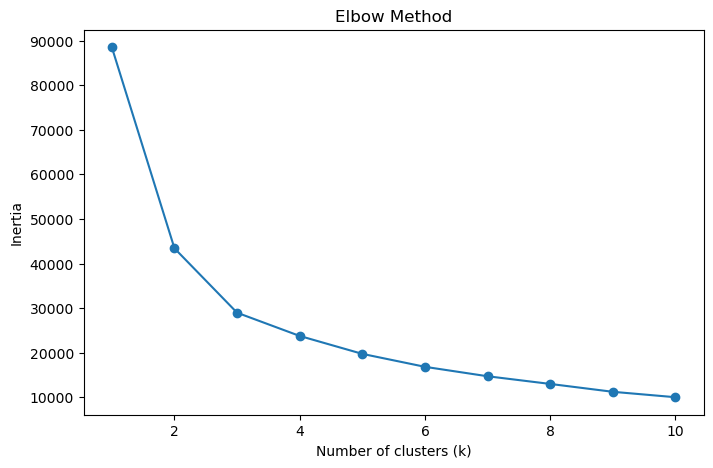

In [101]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), a, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
4. Evaluating the Classfication Algorythm

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [104]:
classifier = RandomForestClassifier()

In [106]:
cv_scores = cross_val_score(classifier, X, y, cv=5)

In [107]:
cv = cross_val_score(classifier,X_train,y_train)

In [108]:
print("Cross Validation Score is : ",cv)

Cross Validation Score is :  [0.99470899 0.98412698 0.98412698 0.9893617  0.99468085]


In [109]:
print("Mean Cross-Validation Score: ", cv_scores.mean())

Mean Cross-Validation Score:  0.9948093074487125


In [111]:
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [112]:
y_pred = classifier.predict(X_test)

In [117]:
RFaccuracy = accuracy_score(y_test,y_pred)
RFaccuracy

0.9975308641975309

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      0.99      1.00       175

    accuracy                           1.00       405
   macro avg       1.00      1.00      1.00       405
weighted avg       1.00      1.00      1.00       405



In [ ]:
5.Linear Regression

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [119]:
model_lr = LinearRegression()

In [122]:
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.3, random_state= 1234)

In [123]:
model_lr.fit(X_train,y_train)

LinearRegression()

In [125]:
y_pred = model_lr.predict(X_test)

In [126]:
mse = mean_squared_error(y_test,y_pred)

In [127]:
mse

0.03202931121269207

In [128]:
R_Squared = r2_score(y_test,y_pred)

In [130]:
R_Squared

0.8694755833127499